# Import Lib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

from nltk.tokenize import word_tokenize
from collections import Counter
import collections
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ariza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
eda_tweets = pd.read_csv('./eda tweets.csv')

print(eda_tweets.head())
print('-'*100)
print(eda_tweets.describe())
print('-'*100)
print(eda_tweets.info())
print('-'*100)
print(eda_tweets.shape)
print('-'*100)


  sentimen                                     cleaned_tweets
0  negatif  prabowo indonesia harga bangsa asing berita ho...
1   netral  batu langka tasbih jokowi hadiah habib luthfi ...
2   netral                           jokowi ekonomi indonesia
3  positif  sumatera selatan asi games dampak ekonomi lang...
4  negatif  negara ngutang bangun infrastruktur pakai masy...
----------------------------------------------------------------------------------------------------
       sentimen                                     cleaned_tweets
count      1815                                               1815
unique        3                                               1778
top     positif  wowo salah arah ekonomi akibat deindustrialisa...
freq        612                                                  4
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (tot

In [3]:
X = eda_tweets.cleaned_tweets
y = eda_tweets.sentimen
print(y.value_counts())

positif    612
netral     607
negatif    596
Name: sentimen, dtype: int64


# Sentimen Distribution

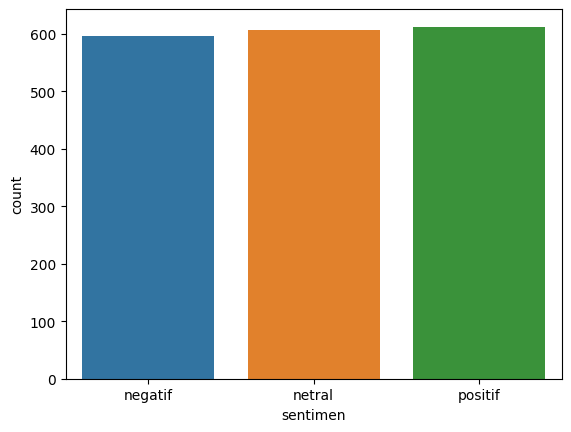

In [4]:
sns.countplot(data=eda_tweets, x=y)
plt.show()

# Word Frequency

c:\Users\ariza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


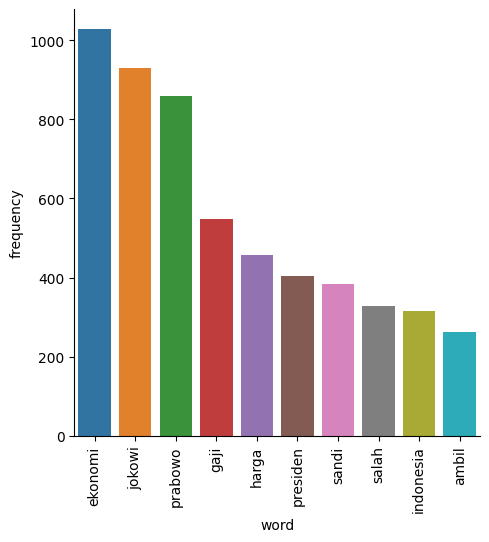

In [5]:
# Hitung frekuensi kata
word_freq = X.str.split(expand=True).stack().value_counts()

# Ubah Series menjadi DataFrame
df = pd.DataFrame(word_freq).reset_index()
df.columns = ['word', 'frequency']

# Ambil 10 kata dengan frekuensi tertinggi
eda_tweets_top10 = df.nlargest(10, 'frequency')

# Buat plot
plot = sns.catplot(data=eda_tweets_top10, x='word', y='frequency', kind='bar')
plot.set_xticklabels(rotation=90)  # Putar label sumbu x
plt.show()

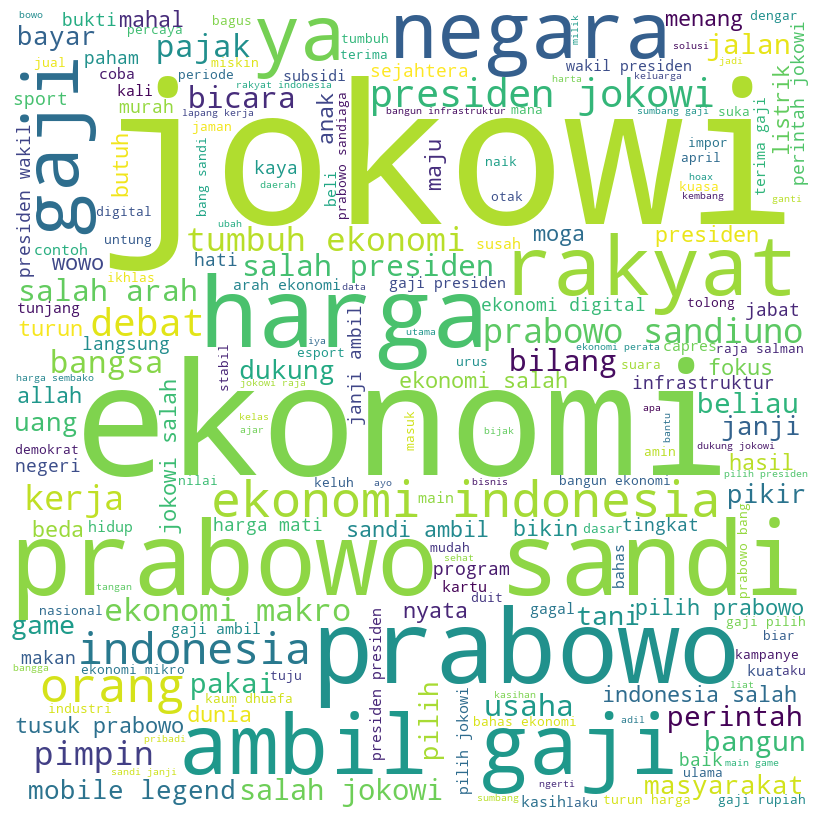

In [6]:
# Gabungkan semua tweet menjadi satu string
all_tweets = ' '.join(eda_tweets['cleaned_tweets'])

# Membuat objek WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(all_tweets)

# Menampilkan WordCloud menggunakan matplotlib
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


# Top 20 Word Frequency in Each Sentiment

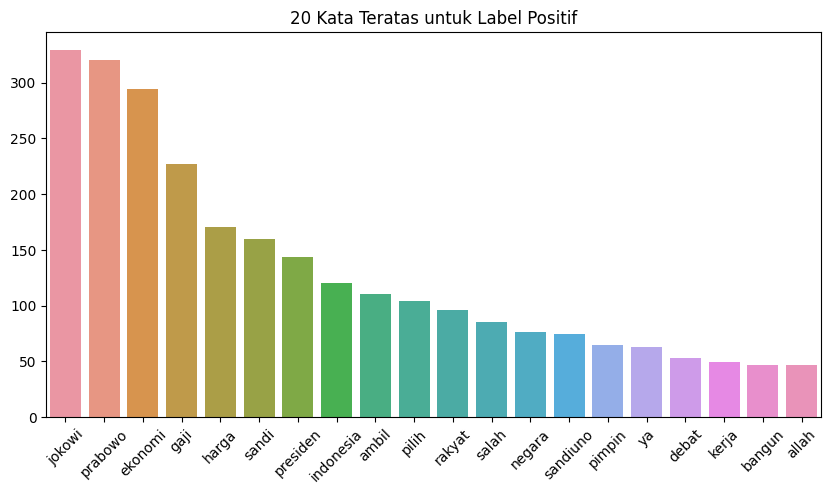

In [7]:
# Fungsi untuk menghitung frekuensi kata
def count_words(texts):
    words = []
    for text in texts:
        for word in word_tokenize(text):
            words.append(word)
    return Counter(words)

# Menghitung frekuensi kata untuk label positif
positive_tweets = eda_tweets[eda_tweets['sentimen'] == 'positif']
word_freq = count_words(positive_tweets['cleaned_tweets'])

# Mendapatkan 10 kata teratas
most_common_words = word_freq.most_common(20)
words = [word for word, freq in most_common_words]
freqs = [freq for word, freq in most_common_words]

# Plotting 10 kata teratas
plt.figure(figsize=(10,5))
sns.barplot(x=words, y=freqs)
plt.title('20 Kata Teratas untuk Label Positif')
plt.xticks(rotation=45)
plt.show()


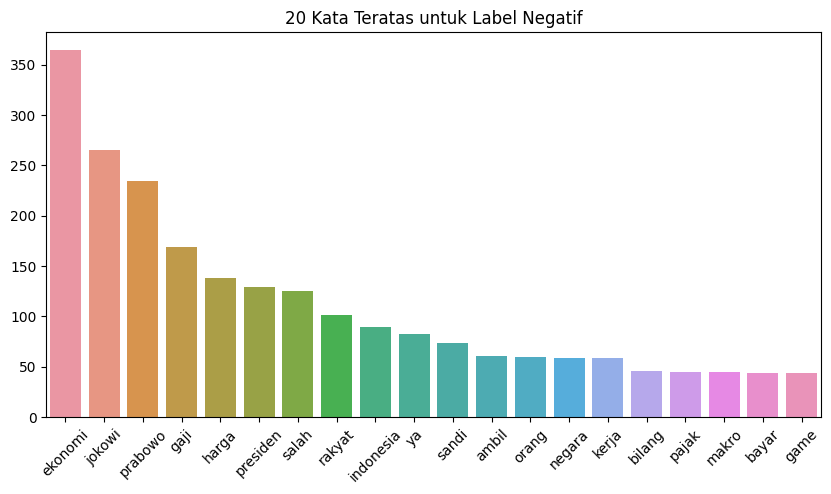

In [8]:
# Menghitung frekuensi kata untuk label positif
negatif_tweets = eda_tweets[eda_tweets['sentimen'] == 'negatif']
word_freq = count_words(negatif_tweets['cleaned_tweets'])

# Mendapatkan 10 kata teratas
most_common_words = word_freq.most_common(20)
words = [word for word, freq in most_common_words]
freqs = [freq for word, freq in most_common_words]

# Plotting 10 kata teratas
plt.figure(figsize=(10,5))
sns.barplot(x=words, y=freqs)
plt.title('20 Kata Teratas untuk Label Negatif')
plt.xticks(rotation=45)
plt.show()


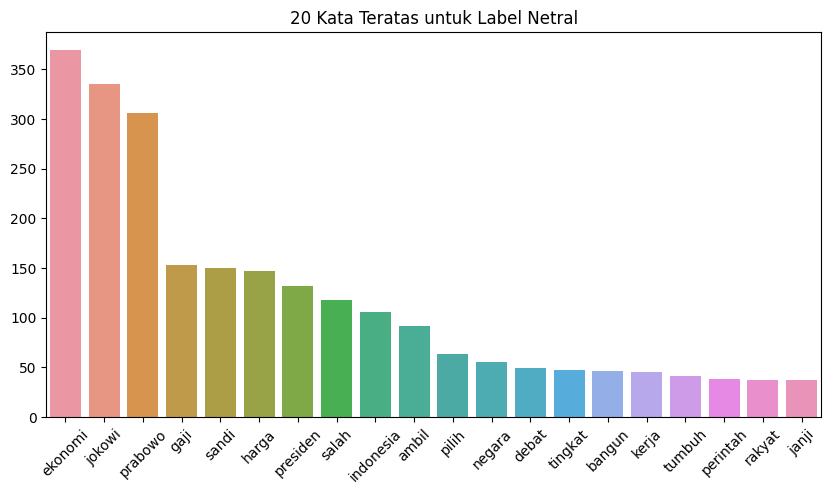

In [9]:
# Menghitung frekuensi kata untuk label positif
netral_tweets = eda_tweets[eda_tweets['sentimen'] == 'netral']
word_freq = count_words(netral_tweets['cleaned_tweets'])

# Mendapatkan 10 kata teratas
most_common_words = word_freq.most_common(20)
words = [word for word, freq in most_common_words]
freqs = [freq for word, freq in most_common_words]

# Plotting 10 kata teratas
plt.figure(figsize=(10,5))
sns.barplot(x=words, y=freqs)
plt.title('20 Kata Teratas untuk Label Netral')
plt.xticks(rotation=45) 
plt.show()
